# Usage

## Math Function Construction and Plotting

In GFuncPy, math functions are `GridFunction` objects that store $x$ and $y$ values. The most common way to create one is with `Identity`, which represents $y = x$ on a grid. You can perform math operations and apply any NumPy univariate function (like `sin`, `cos`, `exp`, `log`, etc.) directly to these objects. See below examples. 

### $\sin(x)$

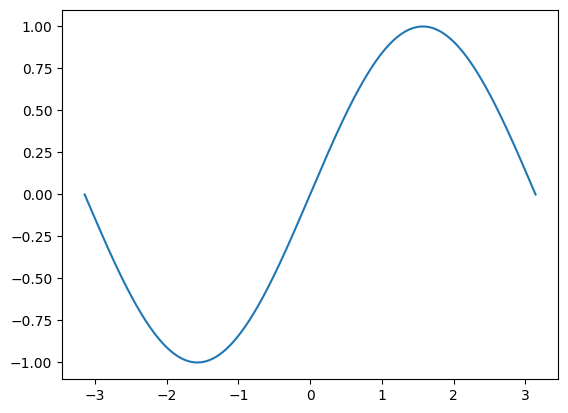

In [1]:
from gfuncpy import Identity, sin
from math import pi

x = Identity([-pi, pi])

sin(x).plot()

### Taylor Series Approximations of $\sin(x)$ 

$$
\sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \dots.
$$

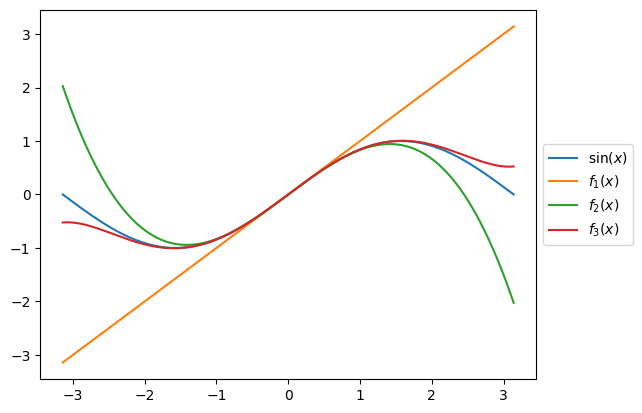

In [2]:
sin(x).plot(label=r'$\sin(x)$')

f1 = x
f2 = x - x**3/6
f3 = x - x**3/6 + x**5/120

f1.plot(label='$f_1(x)$')
f2.plot(label='$f_2(x)$')
f3.plot(label='$f_3(x)$')

### Fourier Series Approximations of $y = x$ 

In $x\in (-\pi, \pi)$, the Fourier series of $y = x$ is 

$$
x = 2\left(\sin(x) - \frac{\sin(2x)}{2} + \frac{\sin(3x)}{3} - \frac{\sin(4x)}{4} + \cdots\right). 
$$

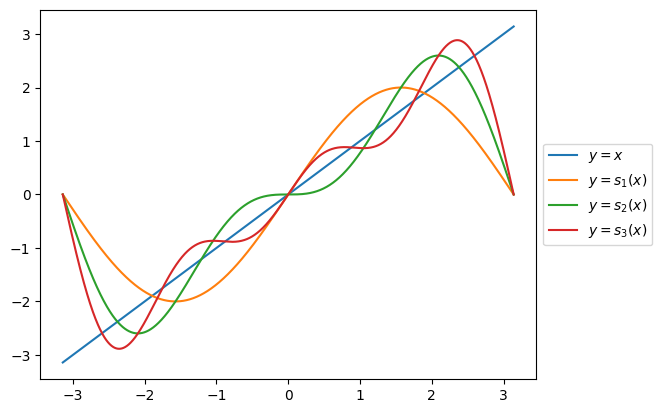

In [3]:
x.plot(label=r'$y = x$')

s1 = 2*sin(x)
s2 = 2*(sin(x) - sin(2*x)/2)
s3 = 2*(sin(x) - sin(2*x)/2 + sin(3*x)/3)

s1.plot(label=r'$y=s_1(x)$')
s2.plot(label=r'$y=s_2(x)$')
s3.plot(label=r'$y=s_3(x)$')

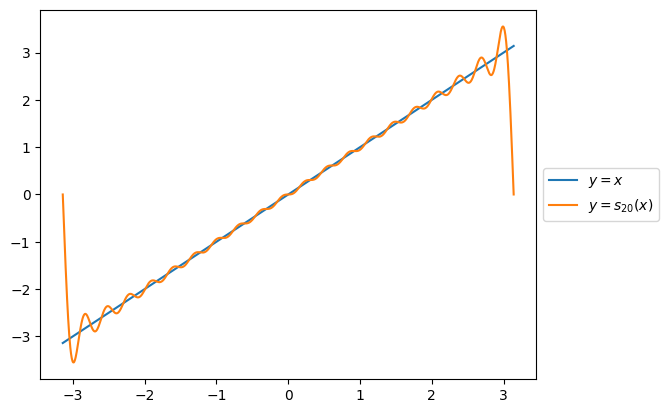

In [4]:
def s(n):
    return 2 * sum((-1)**(k+1) * sin(k*x)/k for k in range(1, n+1))

x.plot(label=r'$y=x$')
s(20).plot(label=r'$y=s_{20}(x)$')

## Numerical Computations

### Root Finding

Root of $x^2 - 2$ in the range $x\in[0, 2]$ is $\sqrt 2$. 

In [5]:
from gfuncpy import Identity, arctan

x = Identity([0, 2])

(x**2 - 2).root()

1.414212389380531

### Point Value of a Function

Example: 

$$
4\arctan(1) = \pi. 
$$

In [6]:
f = arctan(x)

4*f(1)

3.141592653589793

### Definite Integral

Example: 

$$
\int_0^1 \frac{4}{x^2 + 1}\,dx = \pi. 
$$

In [7]:
(4/(x**2 + 1)).integrate(frm=0, to=1)

3.141588486923126

### Indefinite Integral

Example: 

$$
\int_{-\pi}^x \cos(u)\,du = \sin(x). 
$$

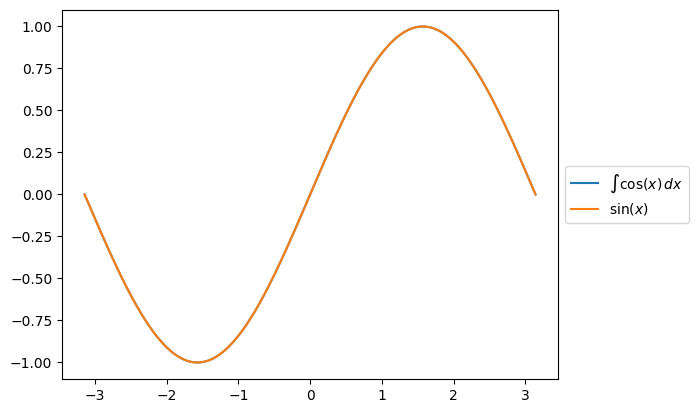

In [8]:
from gfuncpy import Identity, sin, cos
from math import pi

x = Identity([-pi, pi])


cos(x).integrate().plot(label=r'$\int\cos(x)\,dx$')

sin(x).plot(label=r'$\sin(x)$')

## More on Math Function Construction

### `max` and `min` of Two Functions

GFuncPy supports pointwise maximum and minimum operations using `max` and `min`. Here we plot the ReLU function and $\min(x^2, 2-x)$.

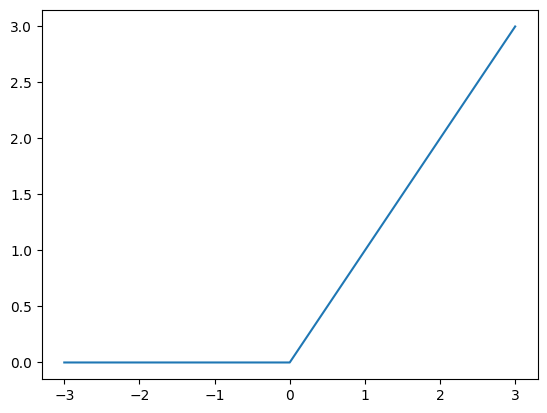

In [9]:
from gfuncpy import Identity, max, min

x = Identity([-3, 3])

relu = max(x, 0)
relu.plot()

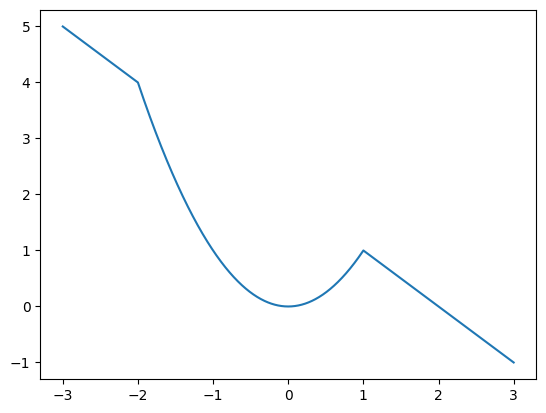

In [10]:
min(x**2, 2-x).plot()

### Making Your Functions Work with `GridFunction`

The `@gfunc` decorator lets you write custom univariate functions that work seamlessly with both scalars and grid-based data. When you pass a `GridFunction`, your decorated function is applied pointwise to every value on the grid, returning a new `GridFunction`; with a scalar, it behaves as the undecorated version. 

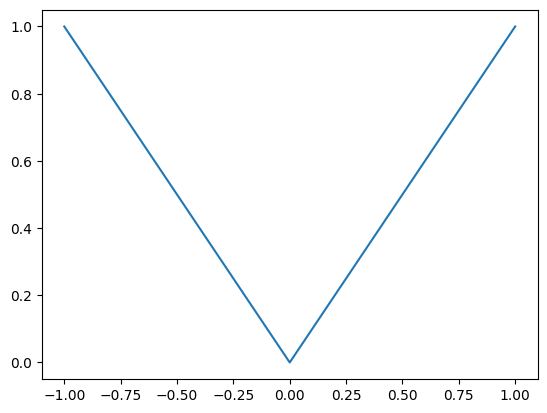

In [6]:
from gfuncpy import gfunc, Identity

@gfunc
def absolute_value(x):
    if x > 0:
        return x
    else:
        return -x

x = Identity([-1, 1])

absolute_value(x).plot()

### Performance Consideration

GFuncPy also supports NumPy's built-in functions (like `sin`, `cos`, `abs`, etc.) directly on `GridFunction` objects—these are fast and vectorized, and should be preferred for most use cases. Use built-in NumPy functions and arithmetic for best performance, and `@gfunc` only when custom logic is needed. Like the above example can and should be done with NumPy's built-in `abs`. 

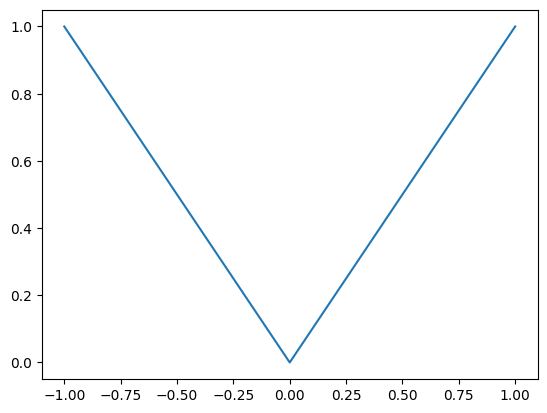

In [7]:
from gfuncpy import abs

abs(x).plot()